In [1]:
import sys
sys.path.append("..")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from src.df_tools import *

sns.set(style="whitegrid")

%matplotlib inline

In [2]:
# Graph definitions

blue = sns.xkcd_rgb['denim blue']
green = sns.xkcd_rgb['medium green']
title_fontsize = 22
legend_fontsize = 13
labels_fontsize = 15


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_small = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
target_classes = ['no victims', 'injured victims', 'deceased victims']

In [3]:
df = pd.read_csv('../data/clean/car_accidents.csv')

/Users/leportella/miniconda3/envs/accidents-pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(2)

,index,id,uf,br,km,county,num_of_people,deceased,mild_injured,severe_injured,...,accident_types_simplified,weekday,hour,period_of_day,road_direction,type_of_road,road_layout,road_layout_simplified,weather,weather_simplified
0,2,1032898,mg,40,585.5,itabirito,3,0,0,1,...,out of road,0,14,afternoon,crescent,simple,straight,straight,clear sky,clear sky
1,3,1051130,ma,135,11,sao luis,5,2,2,1,...,trampling,0,2,night,crescent,simple,straight,straight,clear sky,clear sky


Text(0.5, 1.0, 'Accidents per day of week')

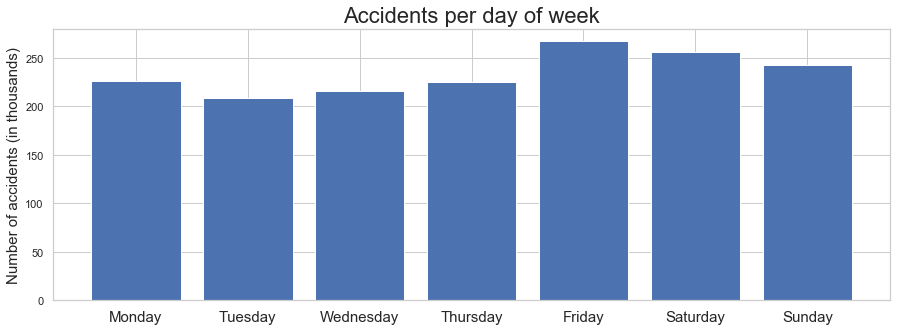

In [5]:
weekdays_count = df.weekday.value_counts().sort_index()

plt.figure(figsize=(15,5))
plt.bar(np.arange(7), weekdays_count.values/1000)
ticks = plt.xticks(np.arange(7), weekdays, fontsize=labels_fontsize)
plt.ylabel('Number of accidents (in thousands)', fontsize=labels_fontsize)
plt.title('Accidents per day of week', fontsize=title_fontsize)

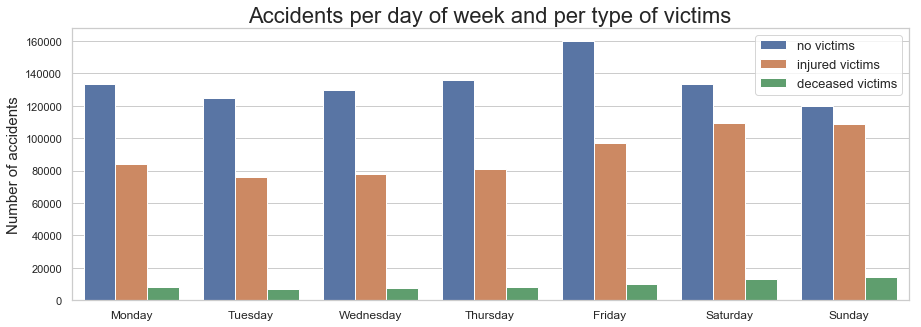

In [6]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="weekday", hue="target", data=df)
ticks = plt.xticks(np.arange(7), weekdays, fontsize=12)

# design definitions
plt.xlabel('')
plt.ylabel('Number of accidents', fontsize=labels_fontsize)
plt.title('Accidents per day of week and per type of victims', fontsize=title_fontsize)
plt.legend(target_classes, fontsize=legend_fontsize)

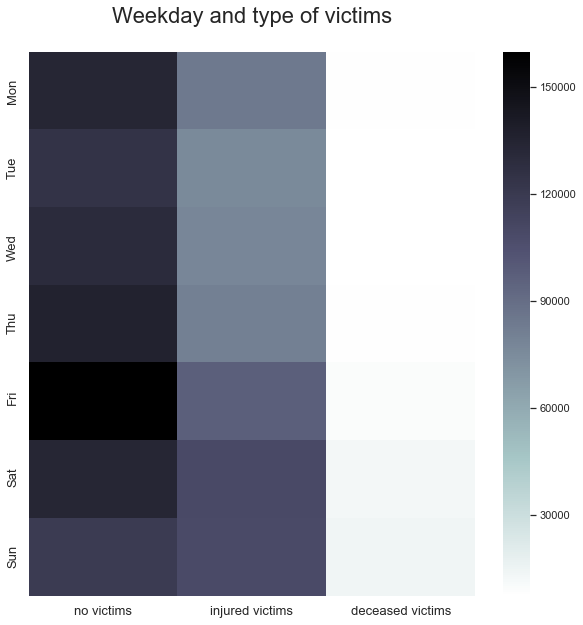

In [7]:
grouped = df.groupby(['weekday', 'target']).size().unstack()

plt.figure(figsize=(10,10))
h = sns.heatmap(grouped, cmap='bone_r')
plt.title('Weekday and type of victims\n', fontsize=title_fontsize)
plt.ylabel('')
plt.xlabel('')
x = plt.xticks(np.arange(3)+0.5, target_classes, fontsize=legend_fontsize)
y = plt.yticks(np.arange(7)+0.4, weekdays_small, fontsize=legend_fontsize)

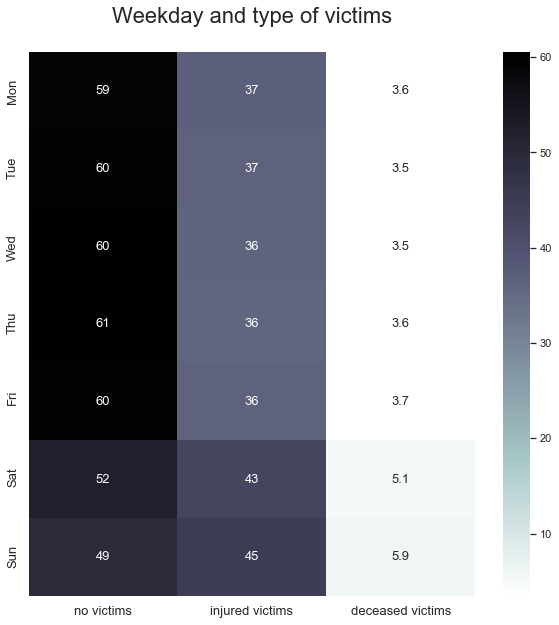

In [17]:
grouped = df.groupby(['weekday', 'target']).size().unstack()
percentage_per_weekday = calculate_df_percentage_by_row(grouped)

plt.figure(figsize=(10,10))
h = sns.heatmap(percentage_per_weekday.T, cmap='bone_r', annot=True, annot_kws={"size": legend_fontsize})
plt.title('Weekday and type of victims\n', fontsize=title_fontsize)
plt.ylabel('')
plt.xlabel('')
y = plt.xticks(np.arange(3)+0.5, target_classes, fontsize=legend_fontsize)
x = plt.yticks(np.arange(7)+0.4, weekdays_small, fontsize=legend_fontsize)